In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from google.colab import drive
drive.mount("/content/drive")
tf.config.list_physical_devices('GPU')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[]

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset.csv")
tempdf = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset.csv")
df = df.drop(["RID","VISCODE2", "AGE","GENDER","EDUCATION"], axis=1)
import random

def optimizeParameters(df):
    acc = 0
    n = 0
    drop = 0;
    for d in range(30,31):
      df = tempdf
      for y in range(len(df)):
        if(df.MMSCORE[y] >= 27 and random.randint(1,100) <= d):
          df.drop(y,inplace = True)
        X = df[["ADNI_MEM", "ADNI_EF"]]
        y = df[["MMSCORE"]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        for x in range(15,80):
          knn_model = KNeighborsRegressor(n_neighbors=x)
          knn_model.fit(X_train, y_train)
          test_preds = knn_model.predict(X_test)
          if (metrics.r2_score(y_test,test_preds) > acc):
            acc = metrics.r2_score(y_test,test_preds)
            n = x
            drop = d
      print(acc)
      print(n)
      print(drop)

#optimizeParameters(df)

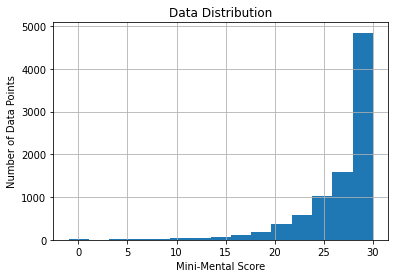

In [22]:
import matplotlib.pyplot as plt
df["MMSCORE"].hist(bins=15)
plt.title('Data Distribution')
plt.xlabel('Mini-Mental Score')
plt.ylabel('Number of Data Points')
plt.show()

In [23]:
correlation_matrix = df.corr()
correlation_matrix["MMSCORE"]

ADNI_MEM       0.724784
ADNI_EF        0.665853
MMSCORE        1.000000
ADDIAGNOSIS   -0.894822
Name: MMSCORE, dtype: float64

No handles with labels found to put in legend.


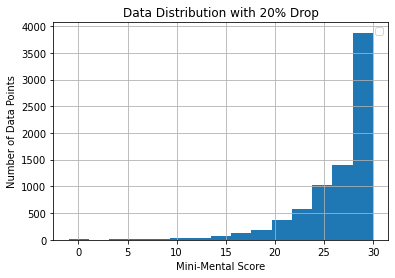

In [24]:
for y in range(len(df)):
  if(df.MMSCORE[y] >= 27 and random.randint(1,100) <= 20):
    df.drop(y,inplace = True)

import matplotlib.pyplot as plt
df["MMSCORE"].hist(bins=15)
plt.title('Data Distribution with 20% Drop')
plt.xlabel('Mini-Mental Score')
plt.ylabel('Number of Data Points')
plt.legend()
plt.show()
plt.show()
X = df[["ADNI_MEM", "ADNI_EF"]]
y = df[["MMSCORE"]]
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25
)

In [25]:
def calcN():
  acc = 0
  
  for x in range(1,200):
    knn_model = KNeighborsRegressor(n_neighbors=x)
    knn_model.fit(X_train, y_train)
    test_preds = knn_model.predict(X_test)
    if (metrics.r2_score(y_test,test_preds) > acc):
      acc = metrics.r2_score(y_test,test_preds)
      n = x
  print(acc)
  print(n)

calcN()

0.6627417674620899
100


In [26]:

knn_model = KNeighborsRegressor(n_neighbors=89)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=89)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(rmse)
acc = metrics.r2_score(y_test,test_preds)
print(acc)

2.454891758356551
0.6617479888178888


In [28]:
knn_model.predict(np.array([0.5,-0.1]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([[27.98876404]])